## Throughput

In [19]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from ipywidgets import Layout, Button, Box
from nested_dict import nested_dict

import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns
import ipywidgets as widgets

sns.set(style="whitegrid")

In [20]:
# Initialization
artifacts_dir = "/home/sk/sandmark/notebooks/interactive/sandmark-nightly/"
selected_files = []
selected_baseline = ""
enable_gui = True

In [21]:
# Parameters cell
if enable_gui == False:
    print(enable_gui)
    print(artifacts_dir)
    print(selected_benches)
    print(selected_baseline)

In [22]:
if enable_gui:
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))

In [23]:
bench_files = []

artifacts_path = artifacts_dir.split("/sandmark-nightly/sequential")[0]
# print(artifacts_path)

for root, dirs, files in os.walk(artifacts_dir):
#     print(dirs)
    for file in files:
#         print(file)
        if file.endswith(".orun.summary.bench"):
            # print(root)
            f = root.split("/sequential/")
#             print(f)
            bench_files.append((os.path.join(root, file)))

# print(bench_files)

In [24]:
len(bench_files)
print(bench_files)

['/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210518_111318/4.12.0+domains+effects_1.orun.summary.bench', '/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210518_111318/4.12.0+stock_1.orun.summary.bench', '/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210520_200001/4.12.0+domains+effects_1.orun.summary.bench', '/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210520_200001/4.12.0+stock_1.orun.summary.bench', '/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210519_060001/4.12.0+domains+effects_1.orun.summary.bench', '/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210519_060001/4.12.0+stock_1.orun.summary.bench', '/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210518_152857/4.12.0+domains+effects_1.orun.summary.bench', '/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210518_152857/4.12.0+stock_1.orun.summary

In [25]:
benches = dict()
for x in bench_files:
    l = x.split("/sequential/")[1]
#     print(l)
    d = l.split("/")
#     print(d)
#     commit     = d[0]
    timestamp  = d[0]
    variant    = d[1]
    value      = timestamp + " " + variant
    if timestamp in benches.keys():
        benches[timestamp].append(value)
    else:
        benches[timestamp]=[value]

In [26]:
benches

{'20210518_111318': ['20210518_111318 4.12.0+domains+effects_1.orun.summary.bench',
  '20210518_111318 4.12.0+stock_1.orun.summary.bench'],
 '20210520_200001': ['20210520_200001 4.12.0+domains+effects_1.orun.summary.bench',
  '20210520_200001 4.12.0+stock_1.orun.summary.bench'],
 '20210519_060001': ['20210519_060001 4.12.0+domains+effects_1.orun.summary.bench',
  '20210519_060001 4.12.0+stock_1.orun.summary.bench'],
 '20210518_152857': ['20210518_152857 4.12.0+domains+effects_1.orun.summary.bench',
  '20210518_152857 4.12.0+stock_1.orun.summary.bench'],
 '20210520_160007': ['20210520_160007 4.12.0+domains+effects_1.orun.summary.bench',
  '20210520_160007 4.12.0+stock_1.orun.summary.bench'],
 '20210519_000001': ['20210519_000001 4.12.0+domains+effects_1.orun.summary.bench',
  '20210519_000001 4.12.0+stock_1.orun.summary.bench']}

In [27]:
def f(x):
    return x

def disp(benches):    
    def select_timestamp(timestamp):
        variantW.options = benches[timestamp]

    def select_variant(variant):
        return None

#     commitW = widgets.Dropdown(options=benches.keys(), description='Commit', disabled=False)
#     commitS = commitW.value
#     commitD = widgets.interactive(select_commit, commit=commitW)

    timestampW = widgets.Dropdown(options=benches.keys(), description='Timestamp', disabled=False)
    timestampS = timestampW.value
#     print(timestampS)
    timestampD = widgets.interactive(select_timestamp, timestamp=timestampW)

    variantW = widgets.Dropdown(options=benches[timestampS], description='Variant', disabled=False)
    varinatS = variantW.value
    variantD = widgets.interactive(select_variant, variant=variantW)

    items_layout = Layout( width='auto' )
    
    box_layout = Layout(display='flex',
                       flex_flow='row wrap',
                       align_items='flex-start',
                       #border='solid',
                       width='100%')
    
    items = [timestampD, variantD]
    box = Box(children=items, layout=box_layout)
#     print(box)
    
    # display(hostD, repoD, commitD)
    display(box)
    return (timestampD, variantD)

def get_filename(timestamp, variant):
#     print(artifacts_path)
    timestamp = timestamp.children[0].value
    variant = variant.children[0].value
    variant = variant.split(" ")
#     print(artifacts_path)
    filename = os.path.join(artifacts_path, "sequential", timestamp, variant[1])
    print(filename)
    return filename

In [28]:
comparisons = interactive(f, x=widgets.IntText(value=2, 
                                               description='Comparisons', 
                                               disabled=False))
display(comparisons)

interactive(children=(IntText(value=2, description='Comparisons'), Output()), _dom_classes=('widget-interact',…

In [29]:
print(comparisons.result)

2


In [30]:
matrix = [[0 for x in range(4)] for y in range(comparisons.result)]  
    
for i in range(comparisons.result):
    matrix[i][0], matrix[i][1] = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210518_111318', '20210520_20…

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210518_111318', '20210520_20…

In [31]:
for i in range(comparisons.result):
    matrix[i][3] = get_filename(matrix[i][0], matrix[i][1])

/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210518_111318/4.12.0+domains+effects_1.orun.summary.bench
/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210518_111318/4.12.0+domains+effects_1.orun.summary.bench


In [32]:
for i in range (comparisons.result):
    print(matrix[i][3])
    selected_files.append(matrix[i][3])

/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210518_111318/4.12.0+domains+effects_1.orun.summary.bench
/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210518_111318/4.12.0+domains+effects_1.orun.summary.bench


In [33]:
if enable_gui == False:
    for i in selected_benches:
        commit_list = i[2].split(" ")
        selected_files.append(os.path.join(artifacts_dir, i[0], i[1], '/'.join(commit_list)))

In [34]:
data_frames = []

for file in selected_files:
    print(file)
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pdjson.json_normalize(data)
        df["variant"] = os.path.basename(file).replace(".orun.summary.bench","")
        df["date_variant"] = file.split("/")[-2] + "_" + df["variant"]
#         print(df["date_variant"])
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210518_111318/4.12.0+domains+effects_1.orun.summary.bench
/home/sk/sandmark/notebooks/interactive/sandmark-nightly/sequential/20210518_111318/4.12.0+domains+effects_1.orun.summary.bench


<ipython-input-34-79d3ec888aba>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pdjson.json_normalize(data)


,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,date_variant
0,yojson_ydump.sample.json,taskset --cpu-list 5 ./ydump.exe -c sample.json,0.80562,0.766983,0.012046,11880,542103.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,903680,3114456,53,18,0,464166,554730,117.248229,4.12.0+domains+effects_1,20210518_111318_4.12.0+domains+effects_1
0,yojson_ydump.sample.json,taskset --cpu-list 5 ./ydump.exe -c sample.json,0.80562,0.766983,0.012046,11880,542103.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,903680,3114456,53,18,0,464166,554730,117.248229,4.12.0+domains+effects_1,20210518_111318_4.12.0+domains+effects_1


### Drop some benchmarks


In [35]:
df = df[(df.name != 'alt-ergo.fill.why') &         #multicore version does not exist
        (df.name != 'alt-ergo.yyll.why') &         #multicore version does not exist
        (df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,date_variant
0,yojson_ydump.sample.json,taskset --cpu-list 5 ./ydump.exe -c sample.json,0.80562,0.766983,0.012046,11880,542103.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,903680,3114456,53,18,0,464166,554730,117.248229,4.12.0+domains+effects_1,20210518_111318_4.12.0+domains+effects_1
0,yojson_ydump.sample.json,taskset --cpu-list 5 ./ydump.exe -c sample.json,0.80562,0.766983,0.012046,11880,542103.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,903680,3114456,53,18,0,464166,554730,117.248229,4.12.0+domains+effects_1,20210518_111318_4.12.0+domains+effects_1


### Selection example

```
select * from df where variant = '4.10.0+trunk' and time_secs > 10
```

In [36]:
baseline_t, baseline_v = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210518_111318', '20210520_20…

In [102]:
selected_baseline = baseline_v.children[0].value.split(" ")[0] + "_" + baseline_v.children[0].value.split(" ")[1].split(".orun.summary.bench")[0]

print(selected_baseline)

20210518_111318_4.12.0+stock_1


In [103]:
df.loc[(df['date_variant'] == selected_baseline) & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,date_variant,gc.heap_chunks,gc.compactions


In [109]:
df.loc[df['name'] == 'LU_decomposition.1024']

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,date_variant,gc.heap_chunks,gc.compactions
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.010668,3.994422,0.015993,29632,53408.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,8218,4,1,5790208,5790208,NaN,4.12.0+stock_1,20210519_060001_4.12.0+stock_1,4.0,0.0
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.180563,4.172287,0.008000,37932,68784.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,8217,2,0,4231434,4231434,3.493154,4.12.0+domains+effects_1,20210519_060001_4.12.0+domains+effects_1,NaN,NaN
11,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.190852,4.162608,0.027990,38128,68784.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,8217,2,0,4231434,4231434,3.492858,4.12.0+domains+effects_1,20210520_200001_4.12.0+domains+effects_1,NaN,NaN


### Projection example

```
select name, variant, time_secs from df
```

In [105]:
df.filter(['name','date_variant','time_secs'])

,name,date_variant,time_secs
11,LU_decomposition.1024,20210519_060001_4.12.0+stock_1,4.010668
11,LU_decomposition.1024,20210519_060001_4.12.0+domains+effects_1,4.180563
11,LU_decomposition.1024,20210520_200001_4.12.0+domains+effects_1,4.190852
36,bdd.26,20210519_060001_4.12.0+domains+effects_1,5.647612
36,bdd.26,20210519_060001_4.12.0+stock_1,5.318837
36,bdd.26,20210520_200001_4.12.0+domains+effects_1,5.644702
43,binarytrees5.21,20210519_060001_4.12.0+domains+effects_1,11.803527
43,binarytrees5.21,20210519_060001_4.12.0+stock_1,12.621412
43,binarytrees5.21,20210520_200001_4.12.0+domains+effects_1,11.862135
35,chameneos_redux_lwt.600000,20210519_060001_4.12.0+stock_1,4.251088


## Time

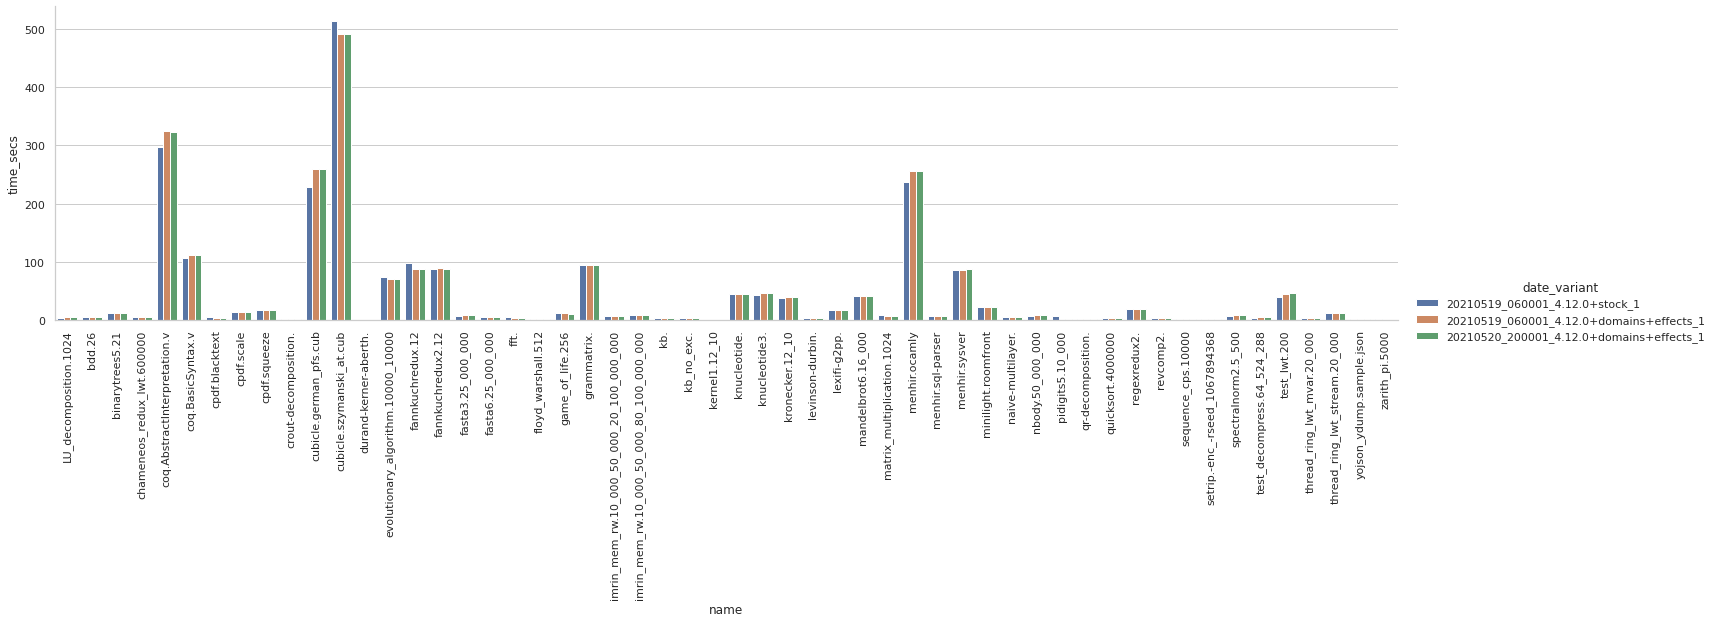

In [106]:
g = sns.catplot (x='name', y='time_secs', hue='date_variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [110]:
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
    variant_metric_name = list([ zip(df[metric], df[x], df['name']) 
              for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
        (v,data) = group
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
                print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')



In [108]:
ndf = normalise(df, selected_baseline, 'time_secs')
plot_normalised(ndf, selected_baseline,'ntime_secs')

KeyError: 'LU_decomposition.1024'

## Top heap words

In [ ]:
g = sns.catplot (x='name', y='gc.top_heap_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [ ]:
ndf = normalise(df, selected_baseline, 'gc.top_heap_words')
plot_normalised(ndf, selected_baseline,'ngc.top_heap_words')

## Max RSS (KB)

In [ ]:
g = sns.catplot (x='name', y='maxrss_kB', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [ ]:
ndf = normalise(df, selected_baseline,'maxrss_kB')
plot_normalised(ndf, selected_baseline,'nmaxrss_kB')

## Major Collections

In [ ]:
g = sns.catplot (x='name', y='gc.major_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [ ]:
ndf = normalise(df, selected_baseline,'gc.major_collections')
plot_normalised(ndf, selected_baseline,'ngc.major_collections')
ndf

## Major words

In [ ]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [ ]:
ndf = normalise(df, selected_baseline,'gc.major_words')
plot_normalised(ndf, selected_baseline,'ngc.major_words')

## Minor Collections

In [ ]:
g = sns.catplot (x='name', y='gc.minor_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

In [ ]:
ndf = normalise(df, selected_baseline, 'gc.minor_collections')
plot_normalised(ndf, selected_baseline, 'ngc.minor_collections')

# Latency

In [ ]:
data_frames = []

for file in glob.glob("*.pausetimes_*.bench"):
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        ldf = pdjson.json_normalize(data)
        ldf['variant'] = file.replace(".pausetimes_multicore.bench","").replace(".pausetimes_trunk.bench","")
        data_frames.append(ldf)

df2 = pd.concat(data_frames, sort=False)
df2 = df2.sort_values(['name'])

## Drop some benchmarks
df2 = df2[(df2.name != 'alt-ergo.fill.why') & #multicore version does not exist
        (df2.name != 'alt-ergo.yyll.why') & #multicore version does not exist
        (df2.name != 'frama-c.slevel') &    #multicore version does not exist
        (df2.name != 'js_of_ocaml.frama-c_byte') &    #multicore version does not exist
        (df2.name != 'cpdf.merge')]         #Not a macro benchmark. Will be removed from subsequent runs.
df2.count()
latency_df = df2
df2

The latency distributions `distr_latency` are a list of latencies at `[10,20,30,40,50,60,70,80,90,95,99,99.9]`th percentiles.

## Max latency

In [ ]:
df2.filter(["name","variant","max_latency"])

In [ ]:
def plotLatencyAt(df,at,aspect):
    fdf = df.filter(["name","variant",at + "_latency"])
    fdf.sort_values(by=[at + '_latency'],inplace=True)
    fdf[at + "_latency"] = fdf[at + "_latency"] / 1000.0
    g = sns.catplot (x='name', y=at+'_latency', hue='variant', data = fdf, kind ='bar', aspect=aspect)
    g.set_xticklabels(rotation=90)
    g.ax.set_ylabel(at + " latency (microseconds)")
    g.ax.set_xlabel("Benchmarks")
    g.ax.set_yscale('log')
    return g

plotLatencyAt(df2,"max",4)

## 99.9th percentile latency

In [ ]:
def getLatencyAt(df,percentile,idx):
    groups = df.groupby('variant')
    ndfs = []
    for group in groups:
        (v,df) = group
        for i, row in df.iterrows():
            df.at[i,percentile+"_latency"] = list(df.at[i,"distr_latency"])[idx]
        ndfs.append(df)
    return pd.concat(ndfs)

df2 = getLatencyAt(df2,"99.9",-1)
plotLatencyAt(df2,"99.9",4)

## 99th percentile latency

In [ ]:
df2 = getLatencyAt(df2,"99",-2)
plotLatencyAt(df2,"99",4)